Complexity Analysis

In order to express the complexity of an algorithm, we can count the number of machine instructions or basic operations that will execute as a function of the input parameters. Counting the operations can give us the running time $T(n)$. This can be simplfied to give us the complexity, $\mathcal{O}$ or big-Oh, by removing constants from the equation that would have a small impact on the overall complexity for very large values of $n$.



## 1. Complexity in Python

The complexity of an algorithm depends on the number of basic operations it contains. In this first exercise you will evaluate the complexity of simple Python functions - instead of algorithms. The idea is the same as algorithm analysis: identify the operations, count them. Take particular care of the loops.
Here is an example:

In [1]:
def function_a (n) :
    print("hello")
    for i in range(n):
        print("n = ", n, "; i=", i) 
    print (" bye ")

In [2]:
function_a(4)

hello
n =  4 ; i= 0
n =  4 ; i= 1
n =  4 ; i= 2
n =  4 ; i= 3
 bye 


The program enters n times in the loop \-  checking the loop condition takes 1 operation (incrementing *i*). The program does only 1 operation every time it enters the loop \- we have 1 * n operations here. Outside the loop there are 2 simple instructions (one before and one after) which do only 1 operation each.

In [3]:
def function_a(n):
    print("hello")          #1 operation
    for i in range(n):      #2 operation (assignment) per loop, N loops
        print("n = ", n)    #1 operation per loop, N operations
    print("bye")            #1 operation 

The running time of this algorithm is computed as follows: every operation with a "per loop" gives a factor of n: here 2 operations, so *3n*; every operation without a "per loop" gives you a value without an _n_: here 2. So in total, T(n)=3n + 2 meaning it is $\mathcal{O}$(n).

In the cell below we have a _magic_ command. These are notebook and not python commands. %%time will request that the OS times the execution of the cell for us and returns it in the cells output.

In [4]:
%%time

def function_b(n):
    print("starting for",n, "loops")          #1 operation
    for i in range(n):                        #2 operation (assignment) per loop, N loops
        for j in range(n):                        #2 operation (assignment) per loop, N loops
            max=n                             #1 operation per loop, N operations
    print("max n=",n)                         #1 operation 

a=3000
function_b(a)

starting for 3000 loops
max n= 3000
CPU times: user 267 ms, sys: 5.83 ms, total: 273 ms
Wall time: 271 ms


We can run the cell repeatedly, changing the value for a. I have done 7 example tests below and recoded the times. I then used the matplotlib (which intalls by default as part of anaconda) to plot $n$ against $t$.

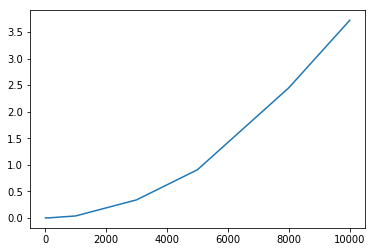

In [5]:
n=[10,100,1000,3000,5000,8000, 10000]

t=[444e-6,619e-6,37.3e-3,340e-3,907e-3,2.45,3.72]

%matplotlib inline  
import matplotlib.pyplot as plt
plt.plot(n,t)
plt.show()

Now do the same for the following 5 programs, labelling the operations and running for various values of $n$ and $m$ to validate the big-$\mathcal{O}$ experimentally. Watch out for the loop definitions.

In [6]:
def function_1(n):
    for i in range(11):
        print(i*n)

In [7]:
def function_2(n):
    s=1
    for i in range(n):
        s=s+i**2
    return s

In [8]:
def function_3(n):
    s=1
    for i in range(n):
        for j in range(n):
            s=s+i*j
    return s

In [9]:
def function_4(n,m):
    i=1;j=1
    opcount=2
    while i<=n and j<=m:
        i=i+1
        j=j+1
        opcount+=2
    return opcount

In [10]:
def function_5(n,m):
    i=1;j=1;s=1
    while i<=n:
        if j<=m:
            s=s*j
            j=j+1
        else:
            s=s+i
            i=i+1
    return s

Run these programs with different values of the $n$ and $m$ parameters. Pick one and experiment on plotting the times. Does the graph match the big-$\mathcal{O}$ you expected?

### Automatic Time (Run-time performance) measuring
Note that the candidate functions have some patterns in their signature (in other words, signature describe what and how many input the function expects). For instance function 1 to 3 expect only 1 input; 4 and 5 expect 2 numbers. So it is possible to construct a looping program to test all input ranges for all functions, so that we don't have to test manually and record the running time manually.

In [11]:
import time
def automatic_time(input_array, func_name):
    # input_array contains all elements of input,
    #   preferably sorted from small to big,
    #   each element could also be a tuple, which is requried
    #   for functions that need more than 1 input
    # func_name is the name of the function (as object, not str)
    # this function also suppresses printing output from the {func_name}
    ret = []
    for val in input_array:
        start = time.time()
        from IPython.utils import io as iuio
        with iuio.capture_output() as suppressed:
            if isinstance(val, tuple):
                _ = func_name(*val)
            else:
                _ = func_name(val)
                
        ret.append((time.time() - start)*10e9) # 10e9 converts unit from second to nanosecond
    return ret

my_input_arr = [10,100,1000,3000,5000,8000, 10000]
print("testing function_1 with the automatic measure")
print("run-time for function 1 result in nanoseconds: \n{}".format(automatic_time(my_input_arr, function_1)))
        

testing function_1 with the automatic measure
run-time for function 1 result in nanoseconds: 
[5800724.029541016, 3230571.746826172, 3318786.62109375, 2918243.408203125, 2870559.6923828125, 2851486.2060546875, 2820491.7907714844]


So now we can construct a bigger loop to automate the rest:

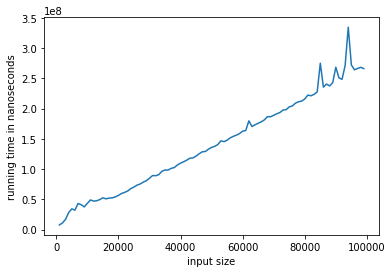

In [12]:
input_arr = [i for i in range(1000, 100000, 1000)]

# input_arr_t = [(i,i) for i in range(1, 1000)]

# fun1 = automatic_time(input_arr, function_1)
fun2 = automatic_time(input_arr, function_2)
# fun3 = automatic_time(input_arr, function_3)
# fun4 = automatic_time(input_arr_t, function_4)
# fun5 = automatic_time(input_arr_t, function_5)

plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in nanoseconds")
plt.show()
